In [58]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
# Setting the seed for the random number generator for reproducibility
np.random.seed(13)

# Getting the data for the plot
data_raw = pd.read_csv('data/key_metrics_202407.csv')

# Review the data
data_raw.head()

,Day of Month,Users,Sessions,Views,Bounce Rate %,Avg Session Duration (Sec),Screen Views per Session,Sessions (New)
0,NaN,14834,19560,38742,0.683487,261.402280,1.980675,13602
1,17.0,789,875,1684,0.675429,240.682211,1.924571,591
2,18.0,756,865,1671,0.686705,219.343257,1.931792,566
3,10.0,699,771,1625,0.664073,256.902490,2.107652,533
4,9.0,698,781,1609,0.667093,260.538618,2.060179,540


In [56]:
# Exclude the very first row 
# (Based on the data review, the Day of Month column shows that the very first row contain some data that are not understandable, 
# so the decicion is not include the data from the first row)
data_excluded_first_row = data_raw.iloc[1:]

# Save the modified DataFrame to a new CSV file
data_excluded_first_row.to_csv('data/key_metrics_202407_processed.csv', index=False)

# Getting the data for the plot
data = pd.read_csv('data/key_metrics_202407_processed.csv')

# Create a subset with only the relevant columns
subset = data[['Users', 'Sessions', 'Views', 'Bounce Rate %', 'Avg Session Duration (Sec)', 'Screen Views per Session', 'Sessions (New)']]

print(subset)

    Users  Sessions  Views  Bounce Rate %  Avg Session Duration (Sec)  \
0     789       875   1684       0.675429                  240.682211   
1     756       865   1671       0.686705                  219.343257   
2     699       771   1625       0.664073                  256.902490   
3     698       781   1609       0.667093                  260.538618   
4     692       769   1588       0.652796                  282.700441   
5     684       755   1614       0.656954                  266.278867   
6     679       748   1423       0.651070                  229.540130   
7     661       751   1572       0.621838                  300.031532   
8     655       753   1425       0.662683                  228.633603   
9     652       735   1601       0.651701                  283.313043   
10    649       709   1561       0.638928                  289.520089   
11    642       722   1658       0.627424                  331.223005   
12    634       712   1486       0.641854          

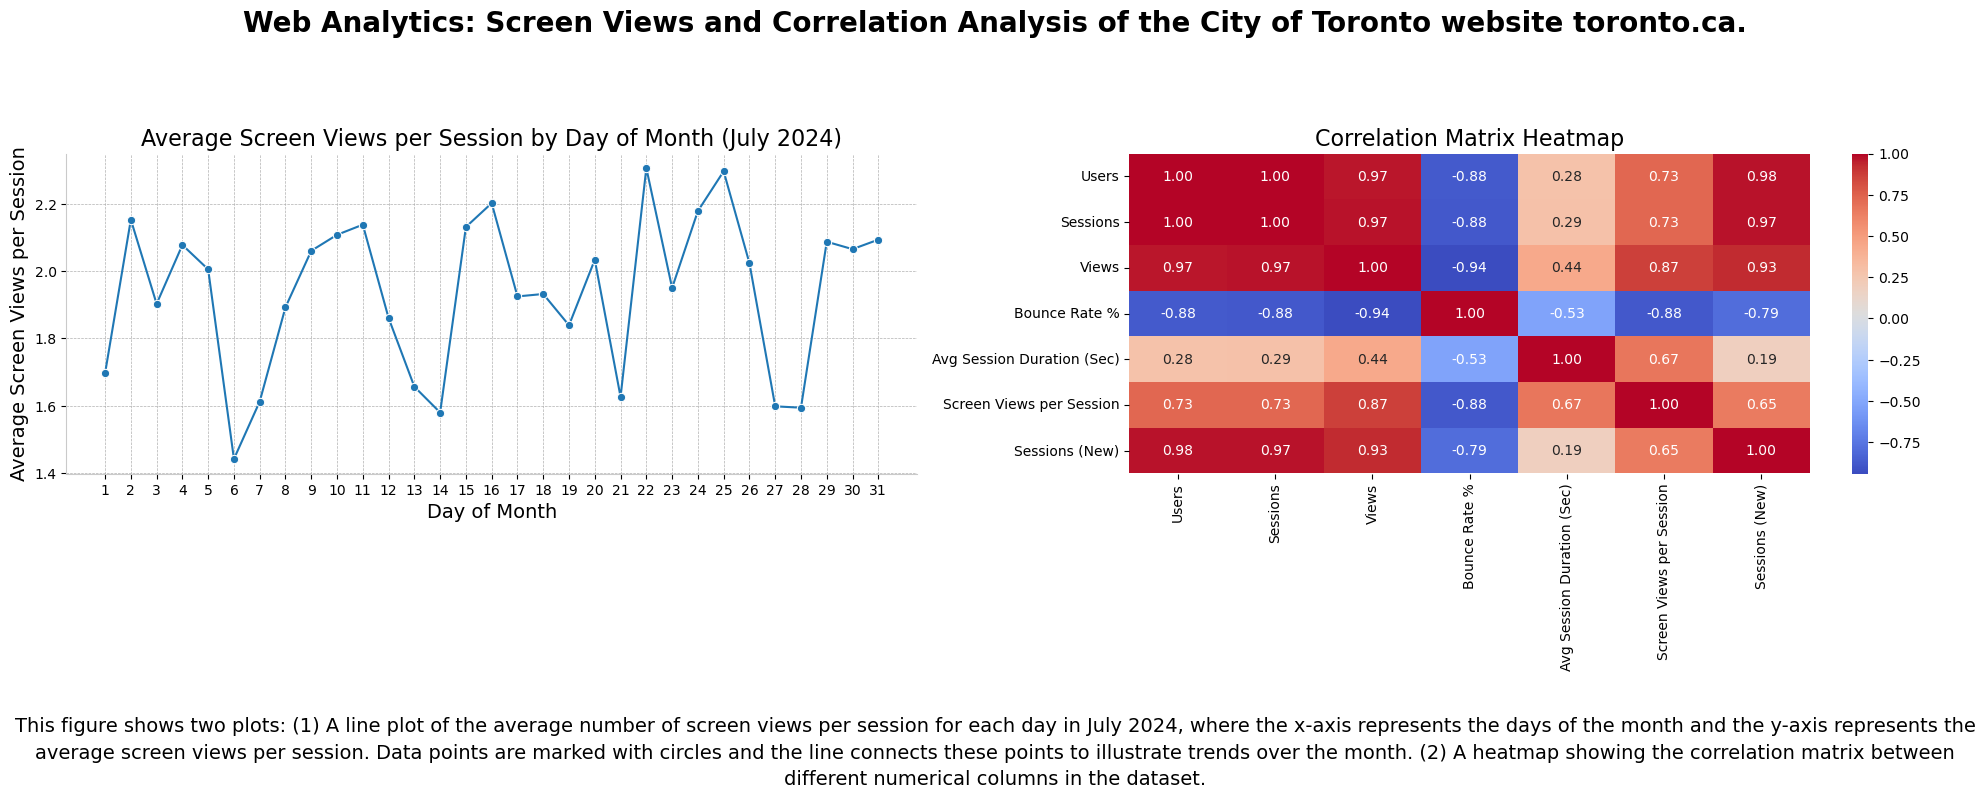

In [57]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Add a main title to the figure
fig.suptitle('Web Analytics: Screen Views and Correlation Analysis of the City of Toronto website toronto.ca.', fontsize=20, fontweight='bold')

# Line plot: Average Screen Views per Session by Day of Month
sns.lineplot(ax=axs[0], x='Day of Month', y='Screen Views per Session', data=daily_avg_screen_views, marker='o')
axs[0].set_title('Average Screen Views per Session by Day of Month (July 2024)', fontsize=16)
axs[0].set_xlabel('Day of Month', fontsize=14)
axs[0].set_ylabel('Average Screen Views per Session', fontsize=14)
axs[0].set_xticks(range(1, 32))  # Assuming days are from 1 to 31
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_color('#cacaca')
axs[0].spines['bottom'].set_color('#cacaca')

# Heatmap plot: Correlation Matrix Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1])
axs[1].set_title('Correlation Matrix Heatmap', fontsize=16)

# Adding a description for accessibility
fig.text(0.5, 0.02, 
         "This figure shows two plots: (1) A line plot of the average number of screen views per session for each day in July 2024, "
         "where the x-axis represents the days of the month and the y-axis represents the average screen views per session. "
         "Data points are marked with circles and the line connects these points to illustrate trends over the month. "
         "(2) A heatmap showing the correlation matrix between different numerical columns in the dataset.",
         wrap=True, horizontalalignment='center', fontsize=14, linespacing=1.5)

# Adjust layout to prevent overlap and to add space
plt.tight_layout()
plt.subplots_adjust(bottom=0.4, top=0.8)

# Show the combined figure
plt.show()